In [7]:
import numpy as np
import random
import math
import csv
from collections import Counter
import matplotlib.pyplot as plt

In [8]:
file_path = '/content/sample_data/diabetes.csv'  # Path to your diabetes.csv file

dataset = []
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip the header
    for row in csv_reader:
        features = [float(x) for x in row[:-1]]  # All except the last column (features)
        label = int(row[-1])  # Last column is the label (0 or 1)
        dataset.append(features + [label])
dataset=np.array(dataset)
print(dataset)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [20]:
def train_test_split(dataset, test_size=0.2):
    data = dataset.tolist()
    random.shuffle(data)
    split_idx = int(len(data) * (1 - test_size))
    return np.array(data[:split_idx]), np.array(data[split_idx:])

train, test = train_test_split(dataset)

classes = np.unique(dataset[:, -1])

In [21]:
def euclidean_distance(point1, point2):
    return math.sqrt(sum((float(p1) - float(p2))**2 for p1, p2 in zip(point1[:-1], point2[:-1])))

In [22]:
def knn_predict(train, test_point, k):
    distances = [(train_point, euclidean_distance(test_point, train_point)) for train_point in train]
    distances.sort(key=lambda x: x[1])
    neighbors = [distances[i][0][-1] for i in range(k)]
    majority_class = Counter(neighbors).most_common(1)[0][0]
    return majority_class

def knn_classifier(train, test, k):
    predictions = []
    for test_point in test:
        predictions.append(knn_predict(train, test_point, k))
    return predictions

def calculate_accuracy(test, predictions):
    correct = sum(1 for i, test_point in enumerate(test) if test_point[-1] == predictions[i])
    return correct / len(test)


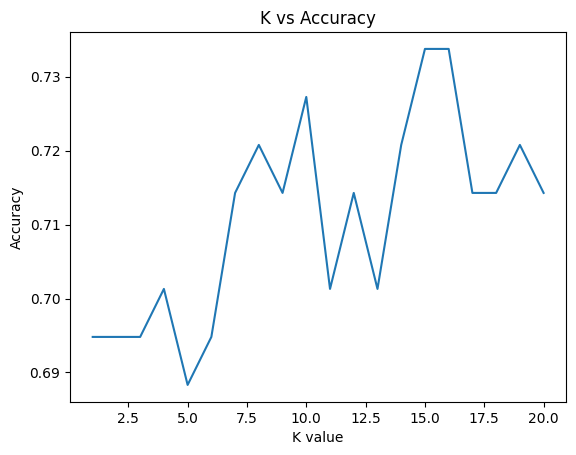

In [19]:

accuracies = []
max_k=20
for k in range(1, max_k + 1):
    predictions = knn_classifier(train, test, k)
    accuracy = calculate_accuracy(test, predictions)
    accuracies.append(accuracy)

# Plot K vs Accuracy
plt.plot(range(1, max_k + 1), accuracies)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

best_k = accuracies.index(max(accuracies)) + 1

best_k, best_accuracy = best_k, max(accuracies)

In [18]:
predictions = knn_classifier(train, test, best_k)
accuracy = calculate_accuracy(test, predictions)
print(f"Test Accuracy with K={best_k}: {accuracy*100:.2f}%")# Confusion Matrix

Test Accuracy with K=15: 73.38%


In [16]:
def confusion_matrix(test, predictions, classes):
    matrix = {class_name: {class_name: 0 for class_name in classes} for class_name in classes}
    for i, test_point in enumerate(test):
        actual = test_point[-1]
        predicted = predictions[i]
        matrix[actual][predicted] += 1
    return matrix

cm = confusion_matrix(test, predictions, classes)
print("Confusion Matrix:")
for actual_class, row in cm.items():
        print(f"{actual_class}: {row}")

Confusion Matrix:
0.0: {0.0: 84, 1.0: 13}
1.0: {0.0: 28, 1.0: 29}


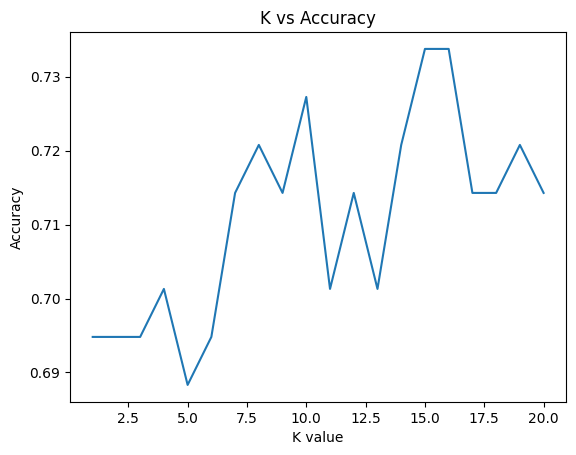



Test Accuracy with K=15: 71.43% 

Confusion Matrix:
0.0: {0.0: 84, 1.0: 13}
1.0: {0.0: 28, 1.0: 29}


In [23]:
# Output

print("\n\n")
# Plot K vs Accuracy
plt.plot(range(1, max_k + 1), accuracies)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()

print(f"\n\nTest Accuracy with K={best_k}: {accuracy*100:.2f}% ")# Confusion Matrix

print("\nConfusion Matrix:")
for actual_class, row in cm.items():
        print(f"{actual_class}: {row}")